In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.drop("Id",axis=1,inplace=True)

In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
float(df.duplicated().sum())

3.0

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(147, 5)

In [10]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

<Axes: >

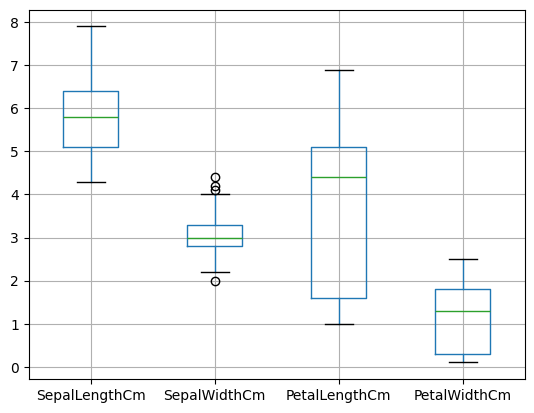

In [11]:
df.boxplot()

In [12]:
def cap_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns  
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for column in numeric_cols:
        df[column] = np.where(df[column] < lower_bound[column], lower_bound[column], df[column])
        df[column] = np.where(df[column] > upper_bound[column], upper_bound[column], df[column])
    return df

df_capped = cap_outliers(df)
print(df_capped.head())
df = df_capped

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


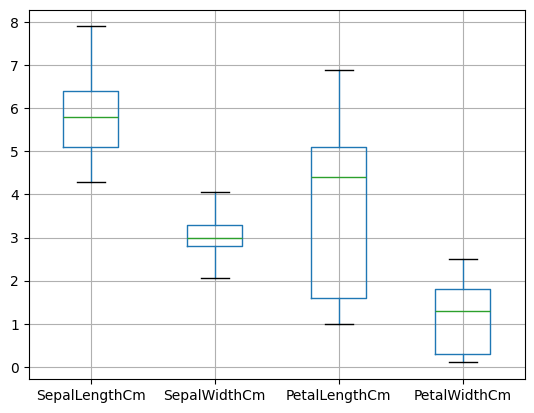

In [13]:
df.boxplot()
plt.show()

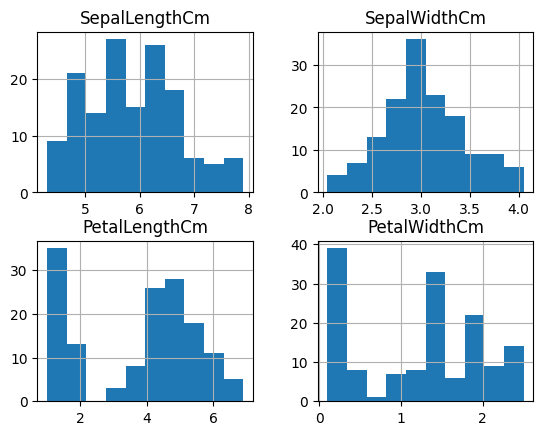

In [14]:
df.hist()
plt.show()

In [15]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
print(df[['Species']])

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[147 rows x 1 columns]


In [16]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [17]:
x=df.iloc[:,:-1]
y=df['Species']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
error_rate = 1 - accuracy

print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Confusion Matrix:
[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
Accuracy: 0.9333
Error Rate: 0.0667
Precision: 0.9342
Recall: 0.9333


In [18]:
print('Training Accuarcy: ', nb.score(X_train,y_train))
print('Test Accuracy: ',nb.score(X_test,y_test))

Training Accuarcy:  0.9607843137254902
Test Accuracy:  0.9333333333333333


In [19]:
accuracy=accuracy_score(y_pred,y_test)
error_rate = 1 - accuracy
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")

Accuracy: 0.93
Error Rate: 0.07


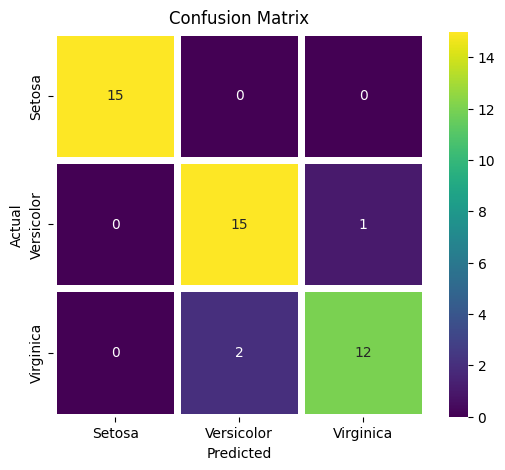

In [20]:
class_names = ["Setosa", "Versicolor", "Virginica"]
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='viridis', linewidths=5, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()